In [1]:
import json
import os
import glob
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import random

In [2]:
import platform

# print machine name
machine_name = platform.node().split(".")[0]
print(machine_name)

# print available scratch directories
print(" ".join(os.listdir(f"/{machine_name}")))

jagupard27
scr1 scr0


In [3]:
DISK_IO_DIR = "/{}/scr1/yiweil".format(machine_name)
print(DISK_IO_DIR)
if not os.path.exists(DISK_IO_DIR):
    os.mkdir(DISK_IO_DIR)

/jagupard27/scr1/yiweil


# Zhang et al. Reddit discourse acts

## Load data

In [40]:
coarse_discourse_dir = 'coarse-discourse'
coarse_discourse_data_path = os.path.join(coarse_discourse_dir,'coarse_discourse_dataset.json')
with open(coarse_discourse_data_path,'r') as f:
    coarse_discourse_data = f.read().splitlines()
coarse_discourse_data_list = [json.loads(coarse_discourse_data[ix]) for ix in range(len(coarse_discourse_data))]
print(len(coarse_discourse_data_list),len(coarse_discourse_data_list[0]))

9483 5


In [41]:
with open(os.path.join(coarse_discourse_dir,'coarse_discourse_dump_reddit.json')) as jsonfile:
    lines = jsonfile.readlines()

post_id_dict = {}
for line in lines:
    reader = json.loads(line)
    for post in reader['posts']:
        post_id_dict[post['id']] = post

print(len(lines))
print(len(post_id_dict))

9483
115827


In [42]:
coarse_discourse_data_list[0]

{'subreddit': '100movies365days',
 'is_self_post': True,
 'url': 'https://www.reddit.com/r/100movies365days/comments/1bx6qw/dtx120_87_nashville/',
 'title': 'DTX120: #87 - Nashville',
 'posts': [{'id': 't3_1bx6qw',
   'annotations': [{'link_to_post': 'none',
     'main_type': 'announcement',
     'annotator': 'fc96a15ab87f02dd1998ff55a64f6478'},
    {'link_to_post': 'none',
     'main_type': 'announcement',
     'annotator': 'e9e4b3ab355135fa954badcc06bfccc6'},
    {'link_to_post': 'none',
     'main_type': 'announcement',
     'annotator': '31ac59c1734c1547d4d0723ff254c247'}],
   'majority_link': 'none',
   'majority_type': 'announcement',
   'is_first_post': True},
  {'in_reply_to': 't3_1bx6qw',
   'post_depth': 1,
   'id': 't1_c9b2nyd',
   'majority_link': 't3_1bx6qw',
   'majority_type': 'elaboration',
   'annotations': [{'link_to_post': 't3_1bx6qw',
     'main_type': 'agreement',
     'annotator': 'fc96a15ab87f02dd1998ff55a64f6478'},
    {'link_to_post': 't3_1bx6qw',
     'main_ty

In [55]:
#post_id_dict['t1_d2rp8sy']#['body']

## Inspect examples manually

In [10]:
def get_examples_of_discourse(discourse_acts):
    out = []
    
    for ix in range(len(coarse_discourse_data_list)):
        posts_ = coarse_discourse_data_list[ix]['posts']
        for post_ in posts_:
            id_ = post_['id']
            try:
                main_type_ = post_['majority_type']
                if main_type_ in discourse_acts:
                    if id_ in post_id_dict:
                        try:
                            text = post_id_dict[id_]['body']
                            out.append((id_,text,main_type_))
                        except KeyError:
                            continue
                            print(id_)
                            print(post_id_dict[id_])
            except KeyError:
                continue#print(post_)
    
    return out

In [11]:
acts_by_type = {discourse_act: get_examples_of_discourse({discourse_act})
               for discourse_act in ['agreement','disagreement','appreciation','negativereaction','question',
                                    'answer','elaboration','humor','announcement']}

In [12]:
acts_by_type['agreement'][:10]

[('t1_cen3bzv',
  "Yeah I was thinking the same, its what I've been doing.",
  'agreement'),
 ('t1_cenqpzw',
  "Oh certainly. I wouldn't be an advocate of anything that makes the game boring for the player because why play if that's the case? My argument is rooted in that it is better to do things other than slayer if you solely want combat exp and money but definitely not better if you want to max. For me (very casual player, 4-6 hours a week), I like nmz because I can study/write papers while I do it with very little lost exp.",
  'agreement'),
 ('t1_chh9beq',
  'I agree Engineering does sound awesome but it would take awhile to think of ways to make it so in-depth for high levels. Summoning, imo, was a great skill. Idk why, I just liked the perks from some of the pets.',
  'agreement'),
 ('t1_d2rp4x5',
  'would love this ive been collecting them for almost a yr now :-)',
  'agreement'),
 ('t1_d3grv0o',
  "That is very true, such a strange feature, I'd be willing to bet its a mistake

In [13]:
acts_by_type['humor'][:10]

[('t1_ckcpwx7', 'In Russia goblin invasion wins you', 'humor'),
 ('t1_csxemb6', 'lol', 'humor'),
 ('t3_3j07o7', '', 'humor'),
 ('t1_cul6ijf', 'acc sharing', 'humor'),
 ('t1_cul6m9s',
  'I think your cat needs attention. You should stroke it.',
  'humor'),
 ('t1_cul7d4d', '>OP stroke your pussy', 'humor'),
 ('t1_cula6iw', 'Have him do rat catchers for you m8', 'humor'),
 ('t1_culhdam', "On the internet, nobody knows that you're a cat.", 'humor'),
 ('t1_culmdfp',
  'Ah, the infamous catkeys. Better than mousekeys by a long shot',
  'humor'),
 ('t1_culf3hh', 'Petscape >_>', 'humor')]

In [9]:
negative_reaction_acts[-5:]

[('t1_cngitkh',
  'Then stop sniveling about people taking away your precious economy and indoor plumbing!\n\n',
  'negativereaction'),
 ('t1_cngioeq',
  'Silliness. The same happens when we ask Pro Athletes or Pop Stars to talk about the world.',
  'negativereaction'),
 ('t1_cngkvm4', 'Bye.', 'negativereaction'),
 ('t1_cngirjx',
  'It sounds like you object to anyone calling you out on *your* hypocrisy, but enjoy calling out the hypocrisy you perceive in others. There might be a word for that, in fact...\n\n\n',
  'negativereaction'),
 ('t1_cngkb25',
  '> You would think that scientists would, having recognized that they came out of this world, would treat it well. \n\nBased on this generalization, clearly, you are speaking of your very limited experience with scientists. \n\n> Perhaps they treat it better than the religious types do, who claim...\n\nTypes? More generalizations. \n\n> better...\n\nUnsubstantiated. Better or worse only depends on who defines those words. The right answ

In [10]:
disagreement_acts[-5:]

[('t1_cn4oefk',
  'As opposed to the shitty inconsistent Synchro build? Please, it suffers from the same problems but with added brick hands.',
  'disagreement'),
 ('t1_cn4oxaw',
  "A) It's not as shitty B) How in the hell does it brick harder than the fusion build where no matter what the best thing you can do is drop a 2k Beater and if you don't have poly or edge-imp you full out lose C) The control build is better than both of them",
  'disagreement'),
 ('t1_cn5cexx',
  "As opposed to any decent deck in the meta. Satellar, battery, Noble Knights, Geargia, even Yang all have had decent showings as solid Tier 2 Decks. I just cannot see Fluffals doing anything against any Tier 2+ deck. I always want more Tier Decks, I don't *want* Fluffs to suck, but all I see is a craply designed archetype like so many that are fun but simply not meta. \n\n\nJust how the game works.",
  'disagreement'),
 ('t1_d0kc0xr',
  "The extra deck is already so tight on this deck, i just can't find space for bot

## Implement BERT-based model

In [ ]:
# simple sequence classification task: input = text; output = label
# https://towardsdatascience.com/bert-text-classification-using-pytorch-723dfb8b6b5b

In [3]:
coarse_discourse_dir = 'coarse-discourse'
data_dir = os.path.join(coarse_discourse_dir,'model_data')

In [27]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training
import torch.optim as optim

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

SEED = 4242

In [5]:
torch.cuda.is_available()

True

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [7]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Model parameters
MAX_SEQ_LEN = 512
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

I0930 09:46:23.010442 139846356690688 tokenization_utils.py:373] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /sailhome/yiweil/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084


In [90]:
# Write train/val etc. data
subsample=False

data_dir = os.path.join(coarse_discourse_dir,'model_data','five_class')
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

LABEL2INT = {
    'agreement':0,
    'disagreement':1,
    'appreciation':2,
    'negativereaction':3,
    'question':4,
    'answer':4,
    'elaboration':4,
    'humor':4,
    'announcement':4
}

data_df = pd.DataFrame({
    'id':[x[0] for x in [item for sublist in acts_by_type.values() for item in sublist]],
    'text':[x[1] for x in [item for sublist in acts_by_type.values() for item in sublist]],
    'label':[LABEL2INT[x[2]] for x in [item for sublist in acts_by_type.values() for item in sublist]]
})

# sample indices for train/val/test 70/10/20
all_ixs = list(data_df.index)
assert len(all_ixs) == len(set(all_ixs)) # make sure indices are unique
train_ixs = set(np.random.choice(all_ixs, size=int(0.7*len(all_ixs)), replace=False))
dev_test_ixs = list(set(all_ixs).difference(train_ixs))
dev_ixs = set(np.random.choice(dev_test_ixs, size=int(0.1*len(all_ixs)), replace=False))
test_ixs = set(dev_test_ixs).difference(dev_ixs)
assert train_ixs.intersection(dev_ixs) == set() # make sure no train/test/dev overlap
assert dev_ixs.intersection(test_ixs) == set()
assert train_ixs.intersection(test_ixs) == set()

# write those slices of data_df to respective csv files
train_df = data_df.iloc[list(train_ixs)].copy()
dev_df = data_df.iloc[list(dev_ixs)].copy()
test_df = data_df.iloc[list(test_ixs)].copy()

# subsample
if subsample:
    maj_class = train_df['label'].value_counts().index[0]
    non_maj_class_df = train_df.loc[train_df['label']!=maj_class]
    subsample_n = int(len(non_maj_class_df)/2)
    train_df = pd.concat([non_maj_class_df,
                          train_df.loc[train_df['label']==maj_class].\
                          sample(n=subsample_n, random_state=SEED, replace=False)],ignore_index=True,axis=0)
    print('Subsampling "{}" class in training data to {} samples.'.format(maj_class,subsample_n))
    
    non_maj_class_df = dev_df.loc[dev_df['label']!=maj_class]
    subsample_n = int(len(non_maj_class_df)/2)
    dev_df = pd.concat([non_maj_class_df,
                          dev_df.loc[dev_df['label']==maj_class].\
                          sample(n=subsample_n, random_state=SEED, replace=False)],ignore_index=True,axis=0)
    print('Subsampling "{}" class in dev data to {} samples.'.format(maj_class,subsample_n))
    
    non_maj_class_df = test_df.loc[test_df['label']!=maj_class]
    subsample_n = int(len(non_maj_class_df)/2)
    test_df = pd.concat([non_maj_class_df,
                          test_df.loc[test_df['label']==maj_class].\
                          sample(n=subsample_n, random_state=SEED, replace=False)],ignore_index=True,axis=0)
    print('Subsampling "{}" class in test data to {} samples.'.format(maj_class,subsample_n))

# TO DO: apply MSL to tokens instead of charstic',
train_df['tokenized_text'] = train_df['text'].apply(lambda x: tokenizer.tokenize(x))
dev_df['tokenized_text'] = dev_df['text'].apply(lambda x: tokenizer.tokenize(x))
test_df['tokenized_text'] = test_df['text'].apply(lambda x: tokenizer.tokenize(x))
train_df['joined_text'] = train_df['tokenized_text'].apply(lambda x: ' '.join(x))
dev_df['joined_text'] = dev_df['tokenized_text'].apply(lambda x: ' '.join(x))
test_df['joined_text'] = test_df['tokenized_text'].apply(lambda x: ' '.join(x))
train_df['truncated_text'] = train_df['joined_text'].apply(lambda x: x[:MAX_SEQ_LEN])
dev_df['truncated_text'] = dev_df['joined_text'].apply(lambda x: x[:MAX_SEQ_LEN])
test_df['truncated_text'] = test_df['joined_text'].apply(lambda x: x[:MAX_SEQ_LEN])

train_df[['truncated_text','label']].to_csv(os.path.join(data_dir,'train.csv'),sep=',',header=True,index=False)
dev_df[['truncated_text','label']].to_csv(os.path.join(data_dir,'dev.csv'),sep=',',header=True,index=False)
test_df[['truncated_text','label']].to_csv(os.path.join(data_dir,'test.csv'),sep=',',header=True,index=False)
print('Wrote train/dev/test splits to {}'.format(data_dir))
print('\nTrain distribution:',train_df['label'].value_counts())
print('\nDev distribution:',dev_df['label'].value_counts())
print('\nTest distribution:',test_df['label'].value_counts())

Wrote train/dev/test splits to coarse-discourse/model_data/five_class

Train distribution: 4    56808
2     6006
0     3441
1     2326
3     1283
Name: label, dtype: int64

Dev distribution: 4    8046
2     843
0     517
1     377
3     197
Name: label, dtype: int64

Test distribution: 4    16180
2     1747
0      995
1      668
3      373
Name: label, dtype: int64


In [13]:
data_dir = os.path.join(coarse_discourse_dir,'model_data','five_class')
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [14]:
# Fields
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
fields = [('truncated_text', text_field), ('label', label_field)]

# TabularDataset
source_folder = data_dir
train, valid, test = TabularDataset.splits(path=source_folder, train='train.csv', validation='dev.csv',
                                           test='test.csv', format='CSV', fields=fields, skip_header=True)

# Iterators
#device = None # CPU
train_iter = BucketIterator(train, batch_size=16, sort_key=None,
                            device=device, train=True, sort=False, sort_within_batch=False)
valid_iter = BucketIterator(valid, batch_size=16, sort_key=lambda x: len(x.text),
                            device=device, train=True, sort=False, sort_within_batch=False)
test_iter = Iterator(test, batch_size=16, device=device, train=False, shuffle=False, sort=False)

In [86]:
NUM_CLASSES = 5

class BERT(nn.Module):

    def __init__(self):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name,num_labels=NUM_CLASSES)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]

        return loss, text_fea

In [93]:
# Save and Load Functions

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [94]:
# Training Function

destination_folder = os.path.join(DISK_IO_DIR,'model_output','bert','five_class')
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)
print('Saving model output to:',destination_folder)

def train(model,
          optimizer,
          criterion = nn.CrossEntropyLoss,
          train_loader = train_iter,
          valid_loader = valid_iter,
          num_epochs = 5,
          eval_every = len(train_iter) // 2,
          file_path = destination_folder,
          best_valid_loss = float("Inf")):
    
    # initialize running values
    running_loss = 0.0
    valid_running_loss = 0.0
    global_step = 0
    train_loss_list = []
    valid_loss_list = []
    global_steps_list = []

    # training loop
    model.train()
    for epoch in range(num_epochs):
        for (texts, labels), _ in train_loader:
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            texts = texts.type(torch.LongTensor)  
            texts = texts.to(device)
            output = model(texts, labels)
            loss, _ = output

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # update running values
            running_loss += loss.item()
            global_step += 1

            # evaluation step
            if global_step % eval_every == 0:
                model.eval()
                with torch.no_grad():                    

                    # validation loop
                    for (texts, labels), _ in valid_loader:
                        labels = labels.type(torch.LongTensor)           
                        labels = labels.to(device)
                        texts = texts.type(torch.LongTensor)  
                        texts = texts.to(device)
                        output = model(texts, labels)
                        loss, _ = output
                        
                        valid_running_loss += loss.item()

                # evaluation
                average_train_loss = running_loss / eval_every
                average_valid_loss = valid_running_loss / len(valid_loader)
                train_loss_list.append(average_train_loss)
                valid_loss_list.append(average_valid_loss)
                global_steps_list.append(global_step)

                # resetting running values
                running_loss = 0.0                
                valid_running_loss = 0.0
                model.train()

                # print progress
                print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
                      .format(epoch+1, num_epochs, global_step, num_epochs*len(train_loader),
                              average_train_loss, average_valid_loss))
                
                # checkpoint
                if best_valid_loss > average_valid_loss:
                    best_valid_loss = average_valid_loss
                    save_checkpoint(file_path + '/' + 'model.pt', model, best_valid_loss)
                    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    
    save_metrics(file_path + '/' + 'metrics.pt', train_loss_list, valid_loss_list, global_steps_list)
    print('Finished Training!')

model = BERT().to(device)
optimizer = optim.Adam(model.parameters(), lr=2e-5)

train(model=model, optimizer=optimizer)

Saving model output to: /jagupard27/scr1/yiweil/model_output/bert/five_class


I0930 16:51:01.655834 139846356690688 configuration_utils.py:151] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /sailhome/yiweil/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517
I0930 16:51:01.660797 139846356690688 configuration_utils.py:168] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 5,
  "output_attentions": false,
  "output_hidden_states": false,
  "pad_token_id": 0,
  "pruned_heads": {},
  "torchscript": false,
  "type_vocab_size"

Epoch [1/5], Step [2183/21835], Train Loss: 0.5473, Valid Loss: 0.4671
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/model.pt
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/metrics.pt
Epoch [1/5], Step [4366/21835], Train Loss: 0.4479, Valid Loss: 0.4452
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/model.pt
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/metrics.pt
Epoch [2/5], Step [6549/21835], Train Loss: 0.3817, Valid Loss: 0.4358
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/model.pt
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/metrics.pt
Epoch [2/5], Step [8732/21835], Train Loss: 0.3807, Valid Loss: 0.4029
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/model.pt
Model saved to ==> /jagupard27/scr1/yiweil/model_output/bert/five_class/metrics.pt
Epoch [3/5], Step [10915/21835], Train Loss: 0.3015, Valid L

I0930 20:47:03.116885 139846356690688 configuration_utils.py:151] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-config.json from cache at /sailhome/yiweil/.cache/torch/transformers/4dad0251492946e18ac39290fcfe91b89d370fee250efe9521476438fe8ca185.7156163d5fdc189c3016baca0775ffce230789d7fa2a42ef516483e4ca884517
I0930 20:47:03.122166 139846356690688 configuration_utils.py:168] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 5,
  "output_attentions": false,
  "output_hidden_states": false,
  "pad_token_id": 0,
  "pruned_heads": {},
  "torchscript": false,
  "type_vocab_size"

Model loaded from <== /jagupard27/scr1/yiweil/model_output/bert/five_class/model.pt
Classification Report:
              precision    recall  f1-score   support

           0     0.6807    0.4221    0.5211       995
           1     0.4706    0.1198    0.1909       668
           2     0.7829    0.7390    0.7603      1747
           3     0.4833    0.0777    0.1339       373
           4     0.8963    0.9676    0.9306     16180

    accuracy                         0.8754     19963
   macro avg     0.6628    0.4652    0.5074     19963
weighted avg     0.8537    0.8754    0.8557     19963



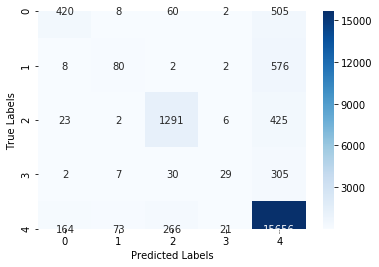

In [95]:
# Evaluation Function

def evaluate(model, test_loader, num_labels):
    y_pred = []
    y_true = []

    model.eval()
    with torch.no_grad():
        for (texts, labels), _ in test_loader:

                labels = labels.type(torch.LongTensor)           
                labels = labels.to(device)
                texts = texts.type(torch.LongTensor)  
                texts = texts.to(device)
                output = model(texts, labels)

                _, output = output
                y_pred.extend(torch.argmax(output, 1).tolist())
                y_true.extend(labels.tolist())
    
    print('Classification Report:')
    print(classification_report(y_true, y_pred, labels=range(num_labels), digits=4))
    
    cm = confusion_matrix(y_true, y_pred, labels=range(num_labels))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='Blues', fmt="d")

    #ax.set_title('Confusion Matrix')

    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')

#     ax.xaxis.set_ticklabels(['agreement', 'disagreement', 'appreciation', 'negative reaction'],
#                            rotation=90)
#     ax.yaxis.set_ticklabels(['agreement', 'disagreement', 'appreciation', 'negative reaction'])
    
best_model = BERT().to(device)

load_checkpoint(destination_folder + '/model.pt', best_model)

evaluate(best_model, test_iter, 5)

In [82]:
0,0,0,0.76,0.52,0.19,0,0,0.13,0.93

{'agreement': 0,
 'disagreement': 1,
 'appreciation': 2,
 'negativereaction': 3,
 'question': 4,
 'answer': 5,
 'elaboration': 6,
 'humor': 7,
 'announcement': 8}

Text(0.5, 0, '')

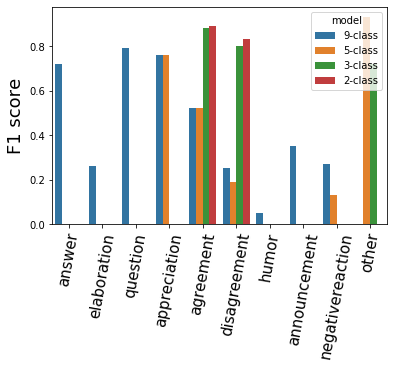

In [96]:
# y-axis: F1
# x-axis: discourse act ['agreement','disagreement','appreciation','negativereaction','other']
models = ['9-class','5-class','3-class','2-class']
acts = ['answer','elaboration','question','appreciation','agreement','disagreement',
       'humor','announcement','negativereaction'] + ['other']

to_plot_df = pd.DataFrame({
    'act': acts*len(models),
    'F1': [0.72,0.26,0.79,0.76,0.52,0.25,0.05,0.35,0.27,0,
          0,0,0,0.76,0.52,0.19,0,0,0.13,0.93,
          0,0,0,0,0.88,0.8,0,0,0,0.72,
          0,0,0,0,0.89,0.83,0,0,0,0],
    'model': [item for sublist in [[m]*len(acts) for m in models] for item in sublist]
})

ax = sns.barplot(data=to_plot_df,x='act',y='F1',hue='model')
ax.set_xticklabels(acts,rotation=80,fontsize=15)
ax.set_ylabel('F1 score',fontsize=18)
ax.set_xlabel('')

# save as hi-res image

# Diyi's contentious conversation classifier

In [ ]:
# at the conversation-level, rather than comment-level

# Simple heuristic models

* use regex to find explicit occurrences of "agree", "disagree"
* some way of connecting deltas w/ agreement? But deltas just indicate that a comment was agreed *with*, not that a comment is agree-*ing*


# Data augmentation

## Label CMV top-level comments as "disagreement"

In [ ]:
# but maybe exclude the ones that contain some regexes, e.g. "I agree"?

## Label responses to ">" quoted text as "disagreement"

In [4]:
from convokit import Corpus, Speaker
corpus = Corpus(
    filename='/sailhome/yiweil/.convokit/saved-corpora/my-cmv-corpus_1-1-2010_to_09-24-2021')
corpus.print_summary_stats()

Number of Speakers: 24936
Number of Utterances: 108095
Number of Conversations: 1155


In [5]:
conversation_ids = corpus.get_conversation_ids()
utterance_ids = corpus.get_utterance_ids()
speaker_ids = corpus.get_speaker_ids()

In [24]:
import re

s = '>  The reason they agree (the massive body of evidence) is, though.\n\nBut continuing with them that is that.\n\n> There is no evidence.\n\nWell, what about the consensus of scientists?\n>'

m = re.findall('> (.+?)\n\n', s)
m

[' The reason they agree (the massive body of evidence) is, though.',
 'There is no evidence.']

In [20]:
found

' The reason they agree (the massive body of evidence) is, though.'

In [23]:
m.group(0)

'>  The reason they agree (the massive body of evidence) is, though.\n\n'

In [14]:
s = '>  The reason they agree (the massive body of evidence) is, though.\n\nBut continuing with the'
re.findall(r'\b(>  |\n\n)', s)

[]

In [ ]:
quote_response_bullets = []

# iterate over all utterances
for utt in corpus.iter_utterances():
    utt_text = utt.text
    
    # Extract spans between ">" and "\n\n" chars
    quotes = re.findall('> (.+?)\n\n', utt_text)
    quote_responses = re.findall('\n\n(.+?)> ', utt_text)
    quote_response_bullets.extend(list(zip(quotes,quote_responses)))

# Apply models to data

## BERT based on Zhang et al. data

In [4]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import torch

# Preliminaries
from torchtext.data import Field, TabularDataset, BucketIterator, Iterator

# Models
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification

# Training
import torch.optim as optim

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

SEED = 4242

I1004 10:07:14.447812 140708168918784 file_utils.py:39] PyTorch version 1.7.1 available.
I1004 10:07:14.966383 140708168918784 modeling_xlnet.py:194] Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex .


In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [6]:
# Model parameters
MAX_SEQ_LEN = 512
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',max_len=MAX_SEQ_LEN)
#tokenizer.encode(text, max_length=2)
PAD_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
UNK_INDEX = tokenizer.convert_tokens_to_ids(tokenizer.unk_token)

I1004 10:07:15.409282 140708168918784 tokenization_utils.py:373] loading file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at /sailhome/yiweil/.cache/torch/transformers/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084


In [11]:
# Pre-process
source_folder = os.path.join(DISK_IO_DIR,'to_predict','cmv_climate_comments')
dat_df = pd.read_csv(os.path.join(source_folder,'cmv_comments_to_predict.csv'),sep=',',header=0)
dat_df['tokenized_text'] = dat_df['body'].apply(lambda x: tokenizer.tokenize(x))
dat_df['joined_text'] = dat_df['tokenized_text'].apply(lambda x: ' '.join(x[:MAX_SEQ_LEN]))
dat_df['truncated_text'] = dat_df['joined_text'].apply(lambda x: x[:MAX_SEQ_LEN])
dat_df[['id','truncated_text','dummy_label']].to_csv(os.path.join(source_folder,'cmv_comments_to_predict_preprocessed.csv'),
                                                sep=',',header=True,index=False)
print('Saved preprocessed prediction data to:',
     os.path.join(source_folder,'cmv_comments_to_predict_preprocessed.csv'))

# Fields
text_field = Field(use_vocab=False, tokenize=tokenizer.encode, lower=False, include_lengths=False, batch_first=True,
                   fix_length=MAX_SEQ_LEN, pad_token=PAD_INDEX, unk_token=UNK_INDEX)
label_field = Field(sequential=False, use_vocab=False, batch_first=True, dtype=torch.float)
fields = [('id',None), ('truncated_text', text_field), ('dummy_label', label_field)]

# TabularDataset
dat = TabularDataset(path=os.path.join(source_folder,'cmv_comments_to_predict_preprocessed.csv'), format='CSV', 
                            fields=fields, skip_header=True)
# dat = TabularDataset(path=os.path.join(source_folder,'cmv_comments_to_predict.csv'), format='CSV', 
#                             fields=fields, skip_header=True)

# Iterators
data_iter = Iterator(dat, batch_size=16, device=device, train=False, shuffle=False, sort=False)

Saved preprocessed prediction data to: /jagupard13/scr1/yiweil/to_predict/cmv_climate_comments/cmv_comments_to_predict_preprocessed.csv


In [60]:
# for x in data_iter:
#     print(x.fields)
#     print(x.truncated_text)##['body'])
#     break

In [19]:
def predict(model, data_loader, num_labels):
    y_pred = []
    #y_true = []

    model.eval()
    with torch.no_grad():
        for (texts, labels), _ in data_loader:
            #print("texts:",texts)
            #print("labels:",labels)
            labels = labels.type(torch.LongTensor)           
            labels = labels.to(device)
            texts = texts.type(torch.LongTensor)  
            texts = texts.to(device)
            output = model(texts, labels)

            _, output = output
            y_pred.extend(torch.argmax(output, 1).tolist())
            #y_true.extend(labels.tolist())
    
    return y_pred

In [16]:
class BERT(nn.Module):

    def __init__(self,num_classes):
        super(BERT, self).__init__()

        options_name = "bert-base-uncased"
        self.encoder = BertForSequenceClassification.from_pretrained(options_name,num_labels=num_classes)

    def forward(self, text, label):
        loss, text_fea = self.encoder(text, labels=label)[:2]

        return loss, text_fea

def save_checkpoint(save_path, model, valid_loss):

    if save_path == None:
        return
    
    state_dict = {'model_state_dict': model.state_dict(),
                  'valid_loss': valid_loss}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model):
    
    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    model.load_state_dict(state_dict['model_state_dict'])
    return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list):

    if save_path == None:
        return
    
    state_dict = {'train_loss_list': train_loss_list,
                  'valid_loss_list': valid_loss_list,
                  'global_steps_list': global_steps_list}
    
    torch.save(state_dict, save_path)
    print(f'Model saved to ==> {save_path}')

def load_metrics(load_path):

    if load_path==None:
        return
    
    state_dict = torch.load(load_path, map_location=device)
    print(f'Model loaded from <== {load_path}')
    
    return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_steps_list']

In [20]:
MODEL_NAME = 'three_class'
destination_folder = os.path.join(DISK_IO_DIR,MODEL_NAME)
best_model = BERT(3).to(device)
load_checkpoint(destination_folder + '/model.pt', best_model)

preds = predict(best_model, data_iter, 3)

In [43]:
Counter(preds)

Counter({2: 2170, 1: 3887, 0: 346})

In [44]:
3887/346 # in CMV data, 11x more disagreeing comments than agreeing comments

11.234104046242775

In [25]:
INT2LABEL = {
    0: "agreement",
    1: "disagreement",
    2: "other"
}

In [26]:
# Write predictions as new column
dat_df['{}_predicted'.format(MODEL_NAME)] = preds
print("Writing data w/ predictions to:",os.path.join(DISK_IO_DIR,'cmv_comments_with_predictions.csv'))
dat_df.to_csv(os.path.join(DISK_IO_DIR,'cmv_comments_with_predictions.csv'),sep=',',header=True,index=False)

Writing data w/ predictions to: /jagupard13/scr1/yiweil/cmv_comments_with_predictions.csv


In [52]:
# Manually annotate first 150 comments
# dat_df[['id','truncated_text']].to_csv(os.path.join('/u/scr/yiweil/Green-American-Lexicon/agreement_detection',
#                                                     'cmv_comments_to_manually_label.csv'),
#                                                    header=True,index=False)
# [scp to local machine to manually label]
# [scp back to cluster]
# manual_labels_df = pd.read_csv(os.path.join('/u/scr/yiweil/Green-American-Lexicon/agreement_detection',
#                                                     'cmv_comments_with_manual_labels.csv'),header=0)
# manual_labels_df = manual_labels_df[['id','truncated_text','label','final_label']]
# manual_labels_df = manual_labels_df.loc[~pd.isnull(manual_labels_df['final_label'])]
# print(manual_labels_df.shape)
# manual_labels_df['final_label'] = manual_labels_df['final_label'].apply(lambda x: {'o': 'other',
#                                                                                   'd': 'disagreement',
#                                                                                   'a': 'agreement'}[x])

# manual_labels_df.to_csv(os.path.join('/u/scr/yiweil/Green-American-Lexicon/agreement_detection',
#                                                     'cmv_comments_with_manual_labels.csv'),header=True,index=False)                                       

(111, 4)


In [62]:
manual_labels_df = pd.read_csv(os.path.join('/u/scr/yiweil/Green-American-Lexicon/agreement_detection',
                                                    'cmv_comments_with_manual_labels.csv'),header=0)
id2manual_label = dict(zip(manual_labels_df['id'],manual_labels_df['final_label']))

In [64]:
# Manually inspect
pred_col_name = '{}_predicted_label'.format(MODEL_NAME)
dat_df[pred_col_name] = dat_df[pred_col_name].apply(lambda x: INT2LABEL[x])
dat_df['manual_label'] = dat_df['id'].apply(lambda x: id2manual_label[x] if x in id2manual_label else -1)
dat_df[['id','body',pred_col_name,'manual_label']].head()

,id,body,three_class_predicted_label,manual_label
0,ces31ae,Your submission has been automatically removed...,other,other
1,celxvm7,"Oh my, there is so much wrong here I hardly kn...",disagreement,disagreement
2,celxtfv,Absolutely not. I completely disagree with thi...,disagreement,disagreement
3,celxzyp,"I agree with you up until your last point, sim...",agreement,disagreement
4,celzxvg,"Your position is reasonable for ""hard sciences...",disagreement,disagreement


In [65]:
len(dat_df.loc[dat_df[pred_col_name]==dat_df['manual_label']])

75

In [67]:
len(dat_df.loc[dat_df['manual_label'] != -1])

111

In [68]:
75/111 # model accuracy

0.6756756756756757

In [74]:
pd.set_option('display.max_colwidth', None)

error_df = dat_df.loc[(dat_df['manual_label'] != -1) &
            (dat_df[pred_col_name]!=dat_df['manual_label'])][['body',pred_col_name,'manual_label']]
len(error_df)

36

In [77]:
len(error_df.loc[error_df['manual_label']=='disagreement'])

28

In [79]:
error_df.loc[error_df['manual_label']=='disagreement'][pred_col_name].value_counts()

other        18
agreement    10
Name: three_class_predicted_label, dtype: int64

In [80]:
error_df.loc[error_df['manual_label']=='disagreement']

body  \
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      I agree with you up until your last point, simply because sociology is not a science. This same argument applies to economics.\n\nWhen it comes to subjects like sociology and economics the experts cannot do experiments and cannot know for certain, but they continue to frame their arguments as if they do know.\n\nWhile all of the other parts of your post cite scientists the last one does not. And therefore their claims can be challenged by the laymen far more easily.\n\nAlso there are many conflicting reports among the fields of study when it comes to subjects like economics and sociology. Both generally claim to study similar things, but economics finds that Black people are poor not because they are oppressed or because they are less efficient but because they started off poor and tend to remain poor, while sociology concludes that they must be oppressed at some point.\n\nSociology claims there is a patriarchy, while economics explains the wage g

In [71]:
# model's main errors are undercounting disagreement
dat_df.loc[dat_df[pred_col_name]!=dat_df['manual_label']]['manual_label'].value_counts()

-1              6292
disagreement      28
other              7
agreement          1
Name: manual_label, dtype: int64

In [82]:
best_model.__dict__.keys()

dict_keys(['training', '_parameters', '_buffers', '_non_persistent_buffers_set', '_backward_hooks', '_forward_hooks', '_forward_pre_hooks', '_state_dict_hooks', '_load_state_dict_pre_hooks', '_modules'])